In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [27]:
df=pd.read_csv("Live_20210128.csv")
df=df.set_index("status_id")

Checks

In [28]:
#Check nulls
df.isna().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [29]:
#Check data types
df.dtypes

status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [30]:
#Check descriptive statistics of columns
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [31]:
#Drop date column
df.drop(columns='status_published',inplace=True)

Exploration

<Figure size 1440x1440 with 0 Axes>

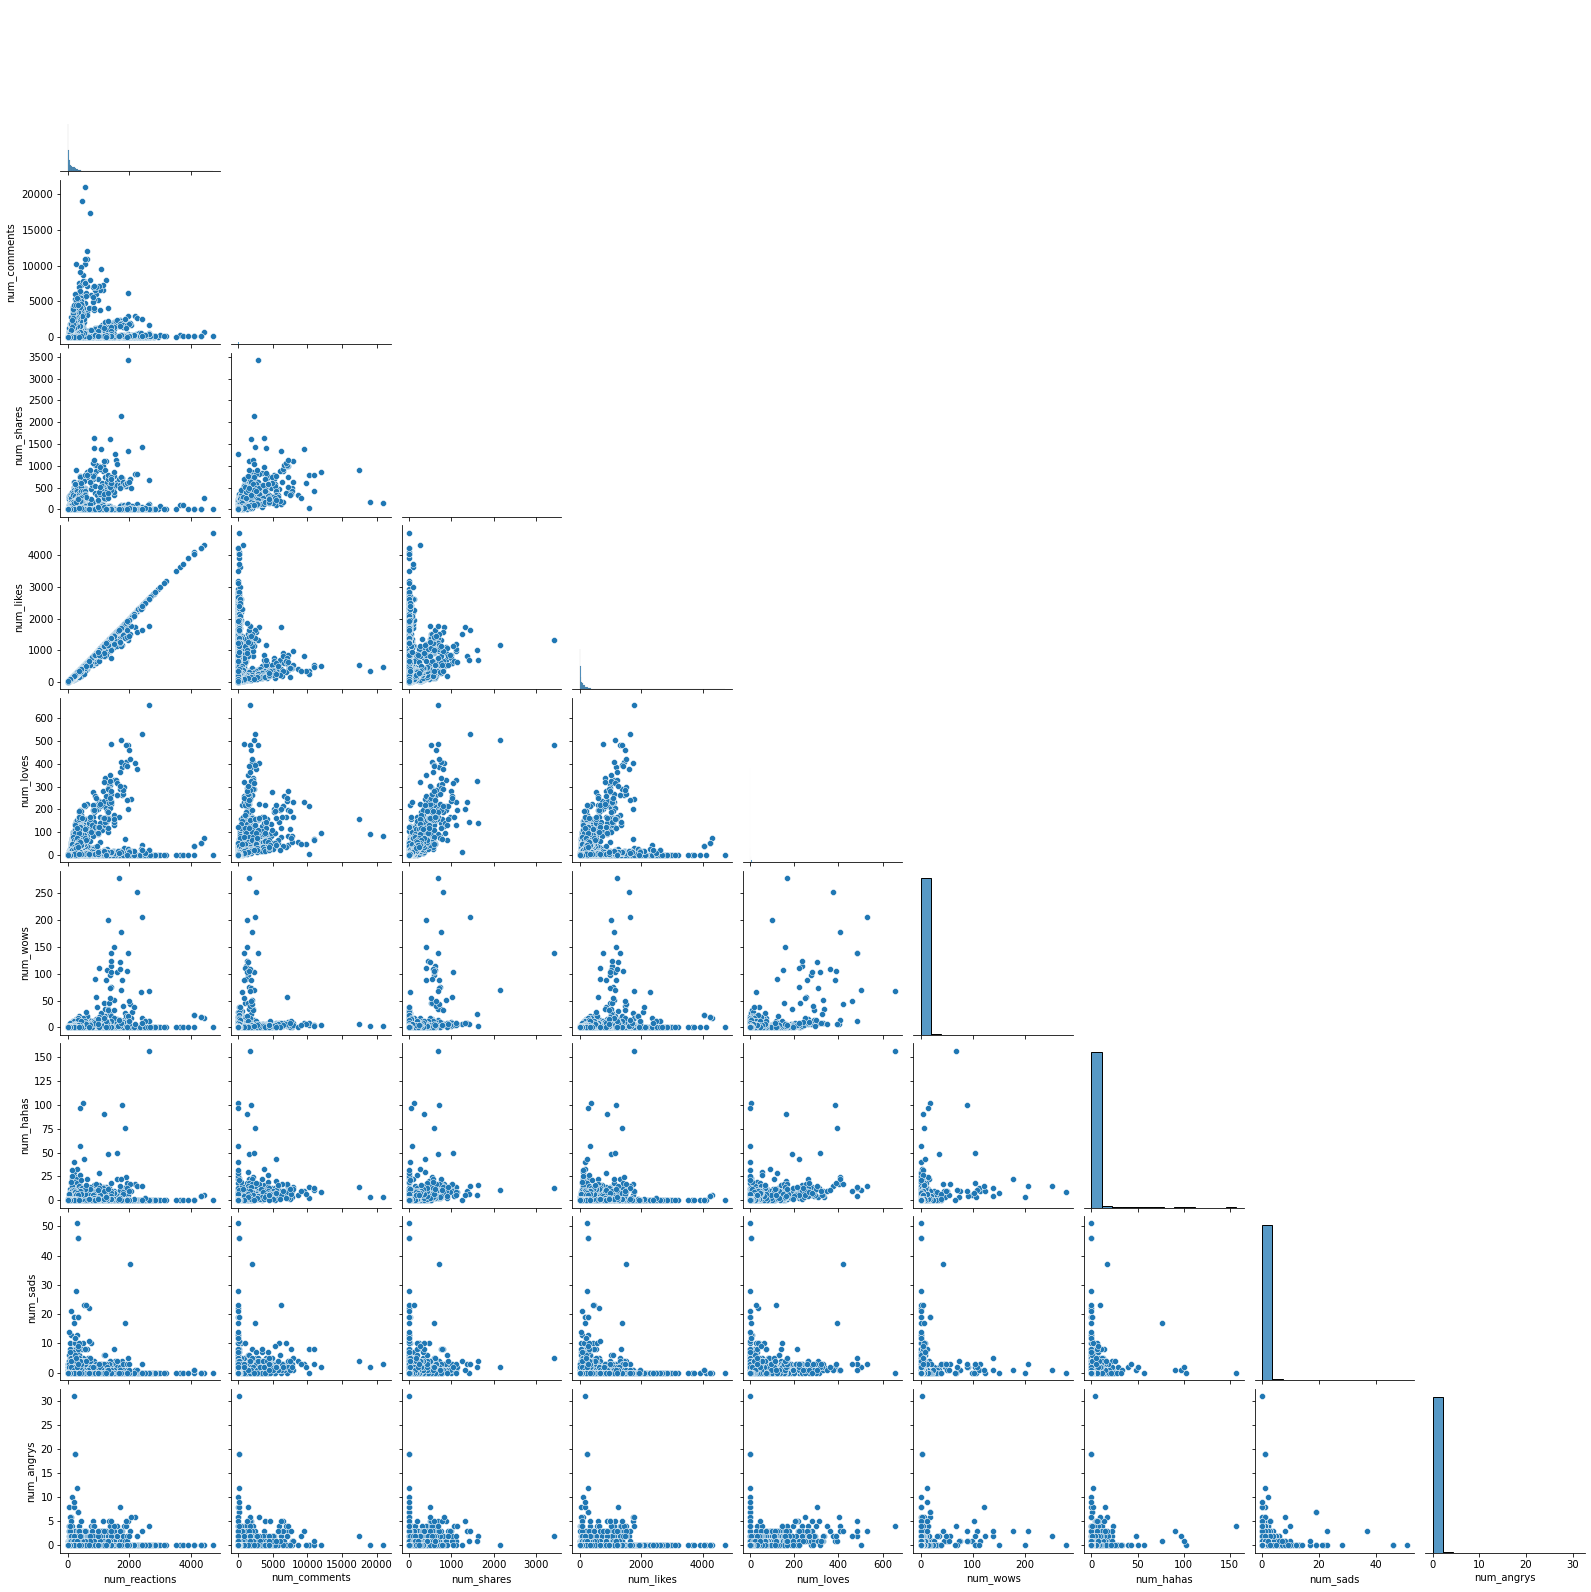

In [32]:
#Pair grids
plt.figure(figsize=(20,20))
sns.pairplot(df,corner=True)

<AxesSubplot:>

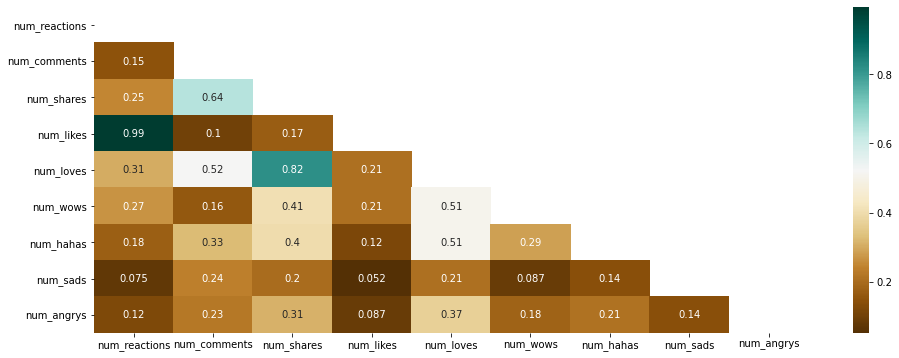

In [33]:
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask=mask,cmap='BrBG',annot=True)

Reactions and likes are 0.99 correlated therefore, num_reactions can be dropped.

In [34]:
df.drop(columns='num_reactions',inplace=True)

Kmeans

In [37]:
#Preprocess post type
df=pd.get_dummies(df,drop_first=True)

In [38]:
#start with a small k value
k=3
kmeans=KMeans(n_clusters=k)
#fit
kmeans.fit(df)
#predict
df['cluster']=kmeans.predict(df)

Visualize

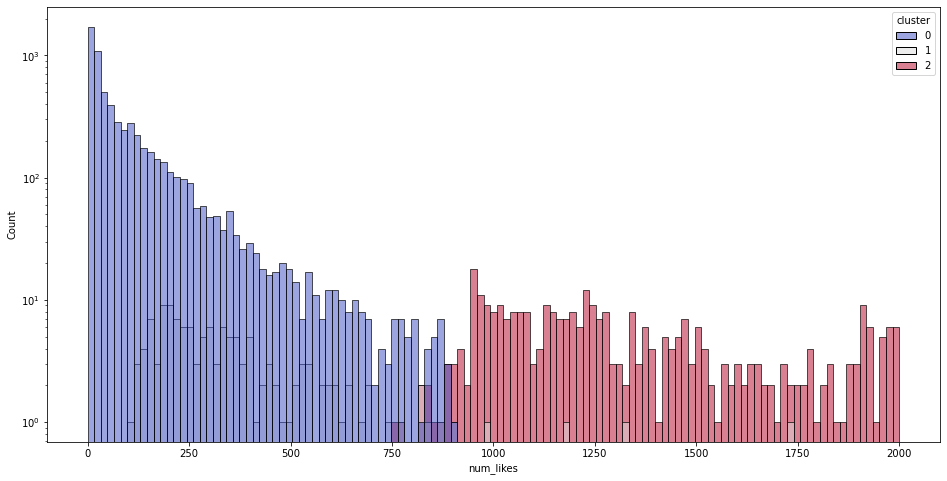

In [50]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_likes',hue='cluster',binrange=(0,2000),palette='coolwarm')
g.set_yscale('log')

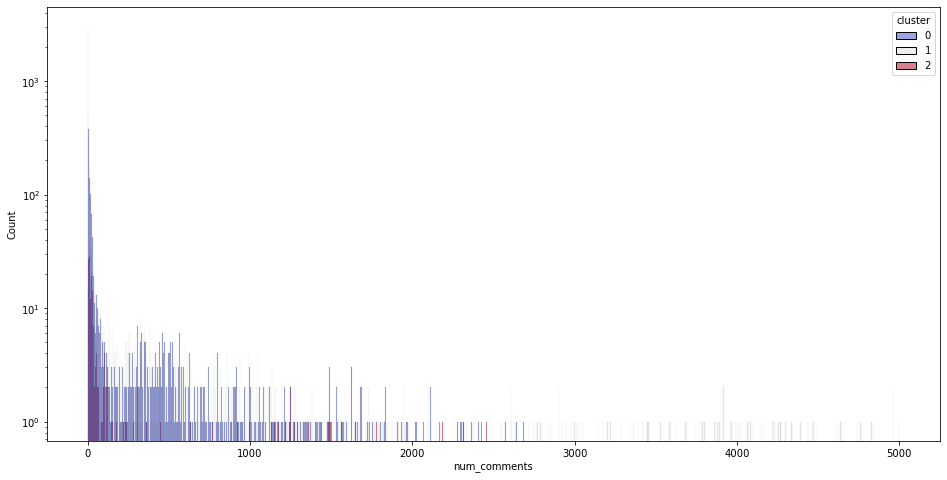

In [56]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_comments',binrange=(0,5000),hue='cluster',palette='coolwarm')
g.set_yscale('log')

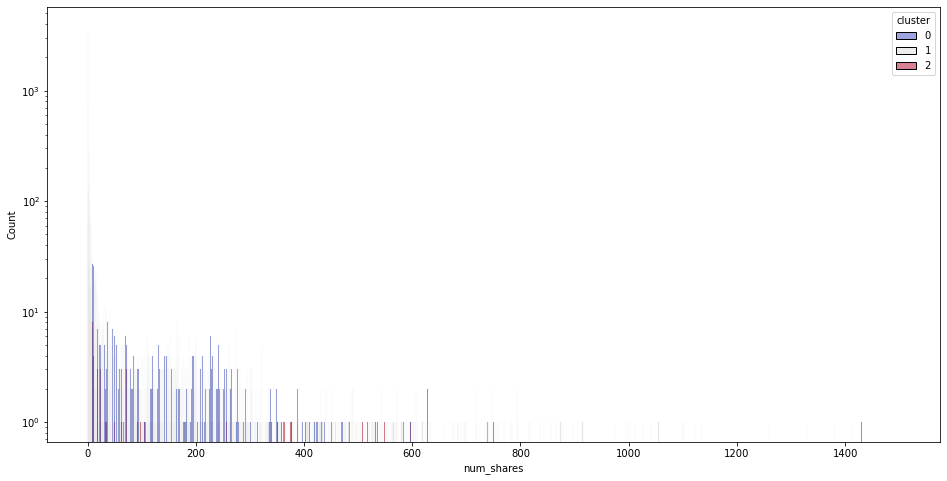

In [58]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_shares',binrange=(0,1500),hue='cluster',palette='coolwarm')
g.set_yscale('log')

Elbow method

Text(0, 0.5, 'Within cluster sum of squares')

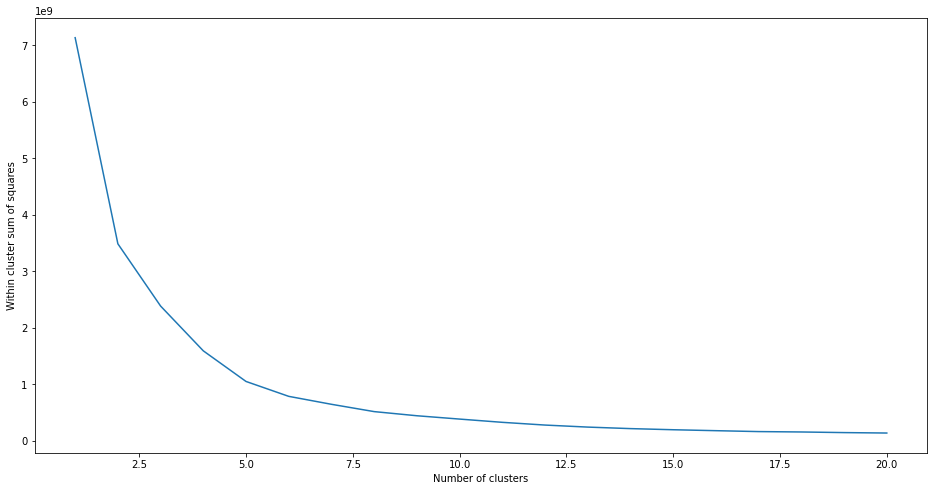

In [62]:
inertia=[]
for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(df.drop(columns='cluster'))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
number_clusters = range(1,21)
plt.plot(number_clusters,inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

Elbow can be seen at 5

In [64]:
k=5
kmeans=KMeans(n_clusters=k)
#fit
kmeans.fit(df.drop(columns='cluster'))
#predict
df['cluster']=kmeans.predict(df.drop(columns='cluster'))

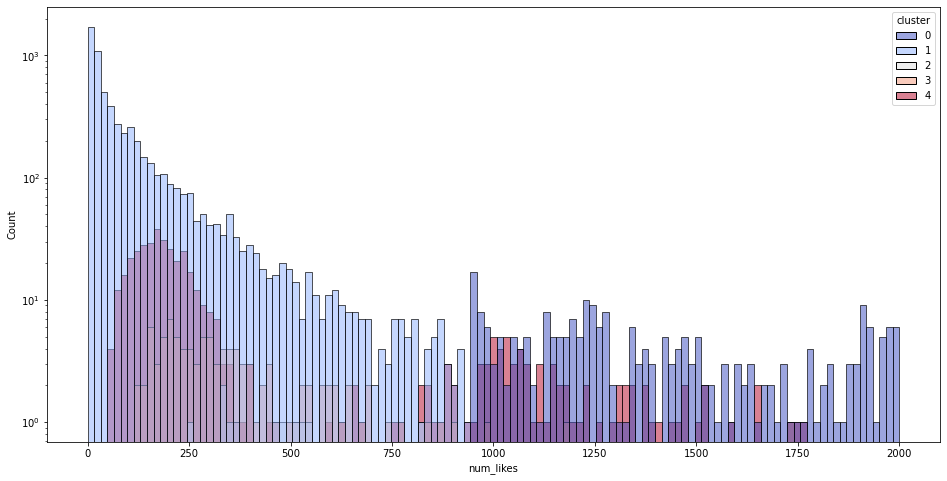

In [65]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_likes',hue='cluster',binrange=(0,2000),palette='coolwarm')
g.set_yscale('log')

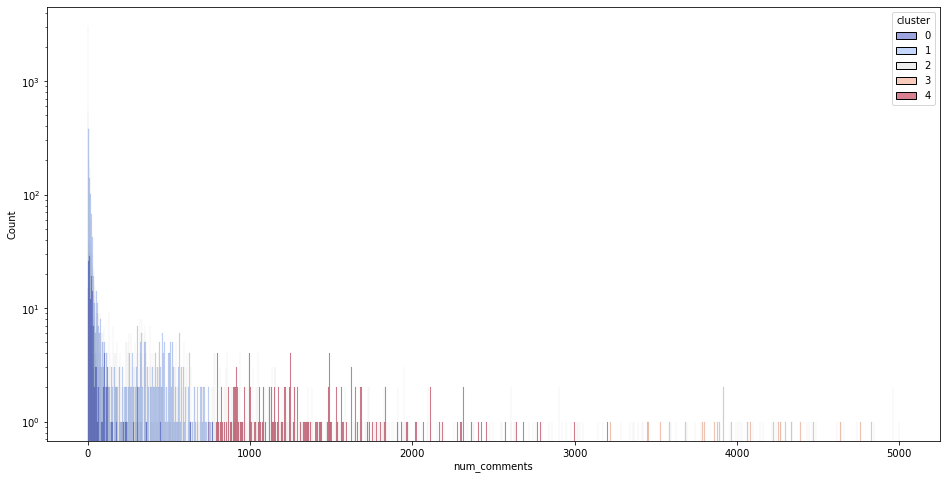

In [66]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_comments',binrange=(0,5000),hue='cluster',palette='coolwarm')
g.set_yscale('log')

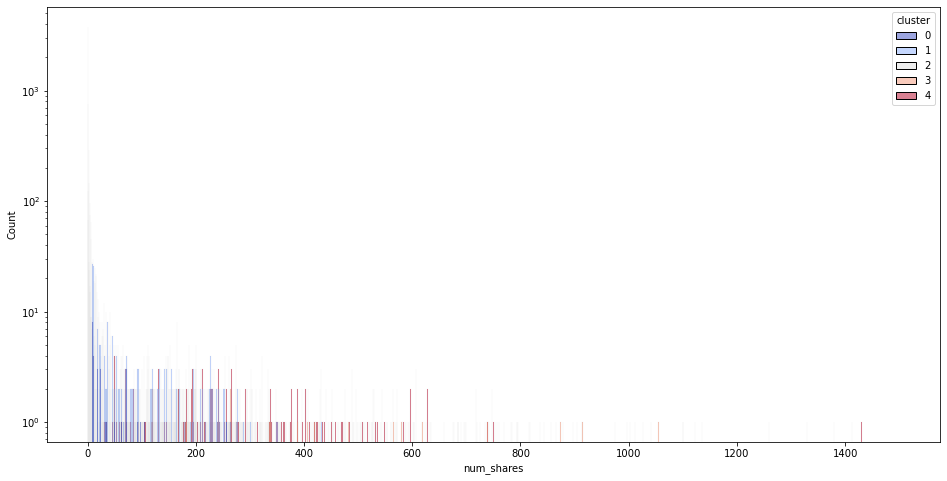

In [67]:
plt.figure(figsize=(16,8))
g=sns.histplot(data=df,x='num_shares',binrange=(0,1500),hue='cluster',palette='coolwarm')
g.set_yscale('log')